In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import joblib

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [17]:
data=pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [19]:
# Find the % of error data
data.isna().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [20]:
#  Find all numerical columns
Numerical_data=[features for features in data.columns if data[features].dtypes!="O"]
discrete_features=[features for features in Numerical_data if len(data[features].unique())<25]
continuous_features=[features for features in Numerical_data if features not in discrete_features]
categorical_features=[features for features in data if features not in Numerical_data]
print("Numerical Features Count {}".format(len(Numerical_data)))
print("Discrete feature Count {}".format(len(discrete_features)))
print("Continuous feature Count {}".format(len(continuous_features)))
print("Categorical feature Count {}".format(len(categorical_features)))


Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [21]:
# Function used for random sample imputation
def randomsampleimputation(data,variable):
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum())
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isna(),variable]=random_sample


In [22]:
randomsampleimputation(data, "Cloud9am")
randomsampleimputation(data, "Cloud3pm")
randomsampleimputation(data, "Evaporation")
randomsampleimputation(data, "Sunshine")


In [23]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

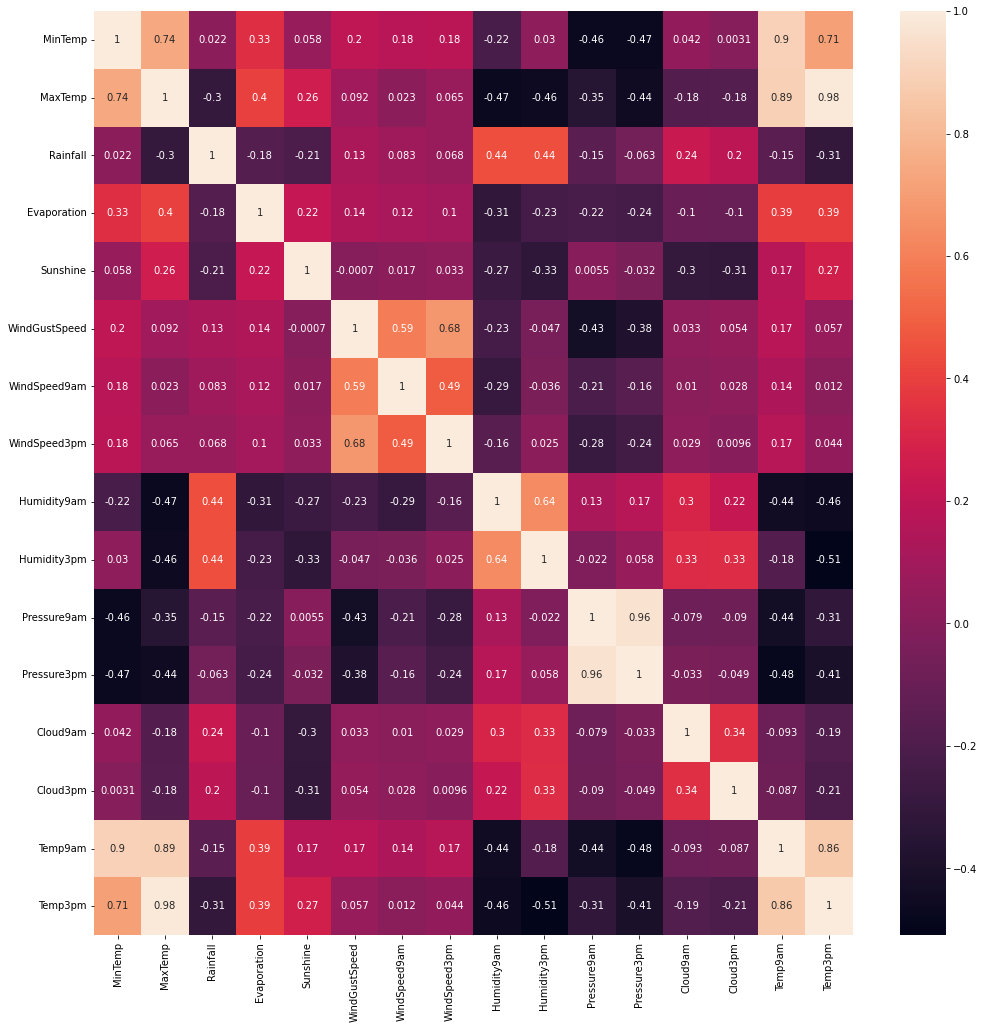

In [24]:
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(17,17))
# Plot heat map
g=sns.heatmap(corrmat,annot=True)


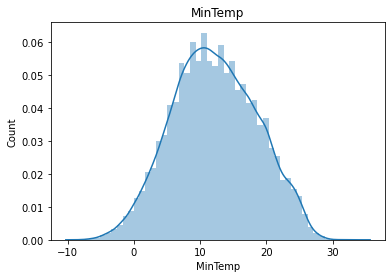

<Figure size 720x720 with 0 Axes>

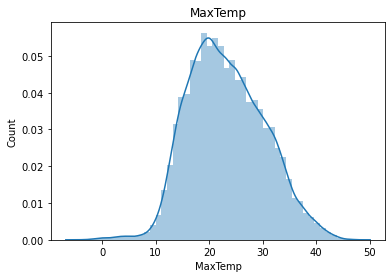

<Figure size 720x720 with 0 Axes>

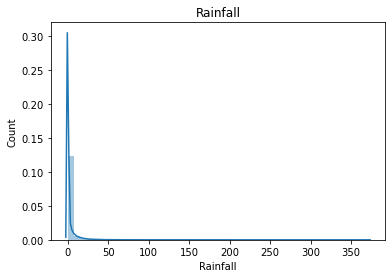

<Figure size 720x720 with 0 Axes>

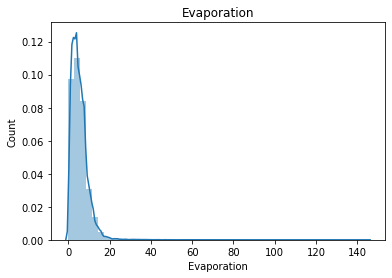

<Figure size 720x720 with 0 Axes>

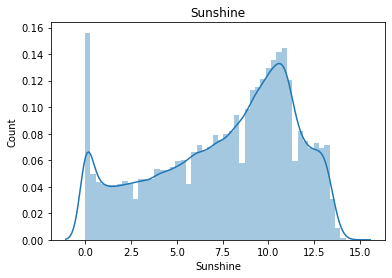

<Figure size 720x720 with 0 Axes>

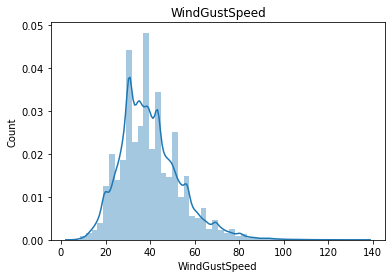

<Figure size 720x720 with 0 Axes>

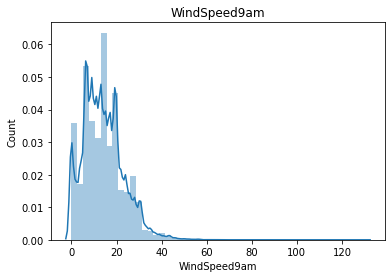

<Figure size 720x720 with 0 Axes>

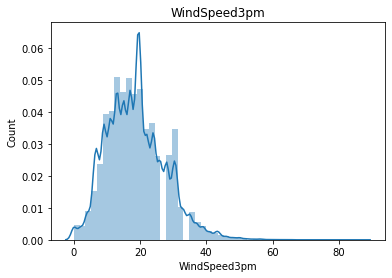

<Figure size 720x720 with 0 Axes>

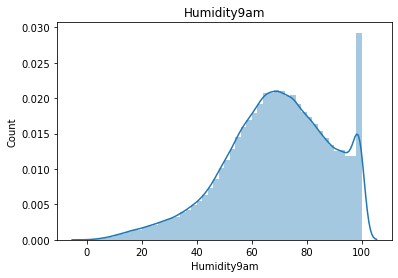

<Figure size 720x720 with 0 Axes>

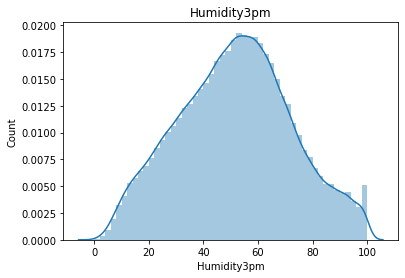

<Figure size 720x720 with 0 Axes>

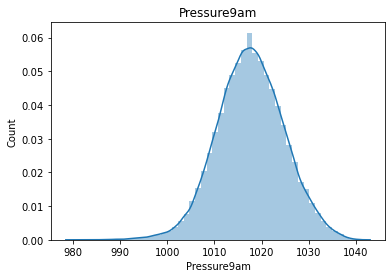

<Figure size 720x720 with 0 Axes>

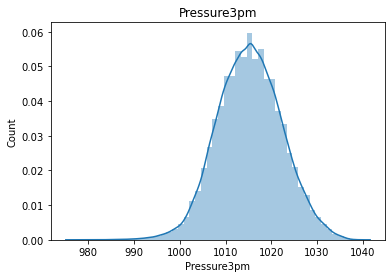

<Figure size 720x720 with 0 Axes>

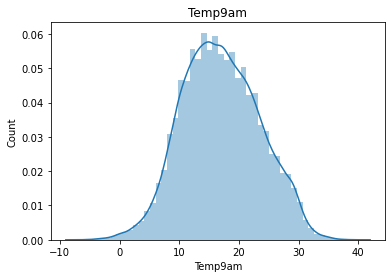

<Figure size 720x720 with 0 Axes>

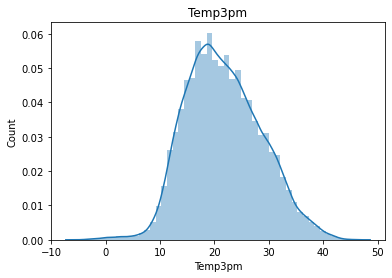

<Figure size 720x720 with 0 Axes>

In [25]:
for feature in continuous_features:
  data1=data.copy()
  sns.distplot(data[feature])
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.figure(figsize=(10,10))
  plt.show()


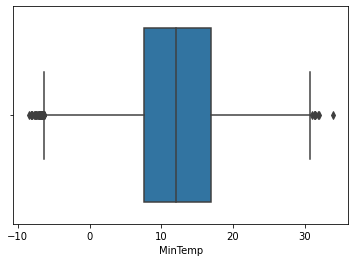

<Figure size 720x720 with 0 Axes>

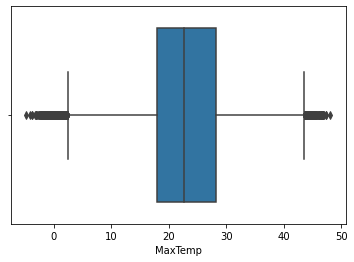

<Figure size 720x720 with 0 Axes>

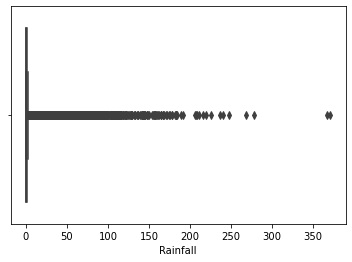

<Figure size 720x720 with 0 Axes>

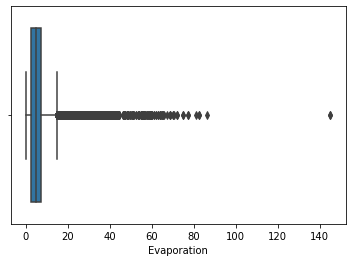

<Figure size 720x720 with 0 Axes>

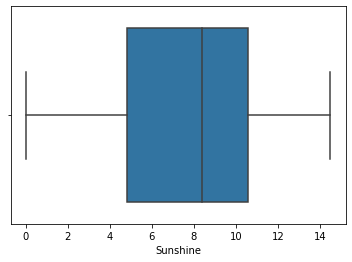

<Figure size 720x720 with 0 Axes>

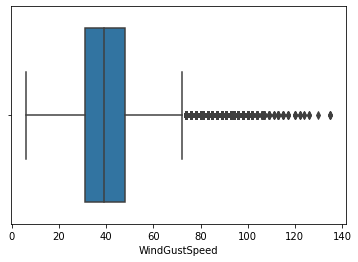

<Figure size 720x720 with 0 Axes>

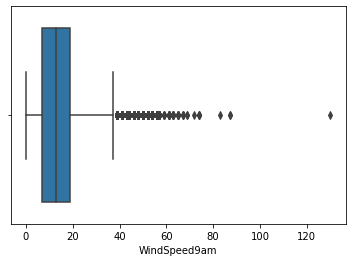

<Figure size 720x720 with 0 Axes>

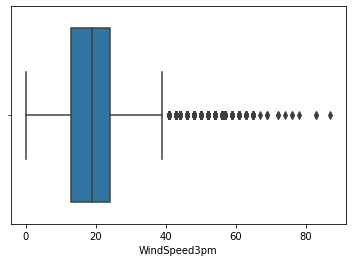

<Figure size 720x720 with 0 Axes>

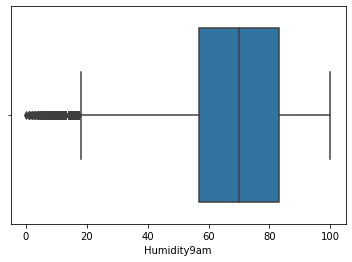

<Figure size 720x720 with 0 Axes>

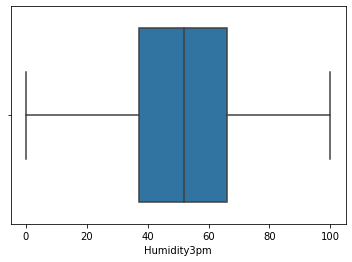

<Figure size 720x720 with 0 Axes>

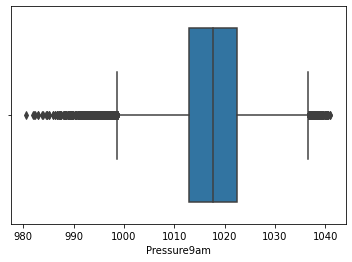

<Figure size 720x720 with 0 Axes>

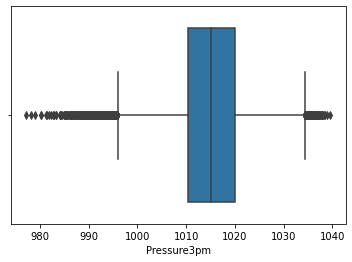

<Figure size 720x720 with 0 Axes>

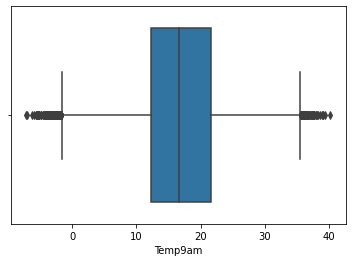

<Figure size 720x720 with 0 Axes>

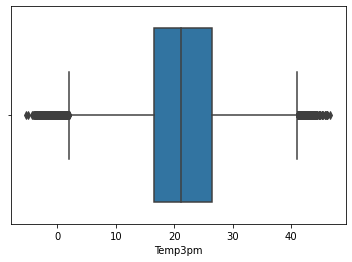

<Figure size 720x720 with 0 Axes>

In [13]:
for feature in continuous_features:
  data1=data.copy()
  sns.boxplot(data[feature])
  plt.figure(figsize=(10,10))
  plt.show()


In [26]:
for feature in continuous_features:
  if (data[feature].isna().sum()*100/len(data))>0:
    data[feature]=data[feature].fillna(data[feature].median())

In [27]:
discrete_features

['Cloud9am', 'Cloud3pm']

In [16]:

data["Cloud9am"]

0         8.0
1         8.0
2         7.0
3         5.0
4         7.0
         ... 
145455    1.0
145456    8.0
145457    8.0
145458    3.0
145459    8.0
Name: Cloud9am, Length: 145460, dtype: float64

In [28]:
def fill(data,variable):
  mode=data[variable].mode()
  data[variable].fillna(mode)
fill(data,"Cloud9am")
fill(data,"Cloud3pm")

In [29]:
data["RainToday"].isna().sum()

3261

In [30]:
data["RainToday"] = pd.get_dummies(data["RainToday"], drop_first = True)
data["RainTomorrow"] = pd.get_dummies(data["RainTomorrow"], drop_first = True)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.6,10.6,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,1.0,9.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,8.0,0.8,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,8.4,10.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,3.0,8.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.2,12.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,3.2,12.3,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,7.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,14.8,3.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,3.0,4.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,2.4,5.9,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,7.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,1.6,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [31]:
for feature in categorical_features:
  print(feature,data.groupby(feature)["RainTomorrow"].mean().sort_values(ascending=False).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [32]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
data["WindGustDir"] = data["WindGustDir"].map(windgustdir)
data["WindDir9am"] = data["WindDir9am"].map(winddir9am)
data["WindDir3pm"] = data["WindDir3pm"].map(winddir3pm)

In [33]:
data["WindGustDir"]=data["WindGustDir"].fillna(data["WindGustDir"].value_counts().index[0])
data["WindDir9am"]=data["WindDir9am"].fillna(data["WindDir9am"].value_counts().index[0])
data["WindDir3pm"]=data["WindDir3pm"].fillna(data["WindDir3pm"].value_counts().index[0])

In [34]:
data2=data.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
data2

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [35]:
data2[1].sort_values(ascending=False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [36]:
data2[1].sort_values(ascending=False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [37]:
len(data2[1].sort_values(ascending=False).index)

49

In [38]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
data["Location"]=data["Location"].map(location)

In [39]:
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT")

In [40]:
data["Date"] 

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [41]:
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  float64       
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  float64       
 10  WindDir3pm     145460 non-null  float64       
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

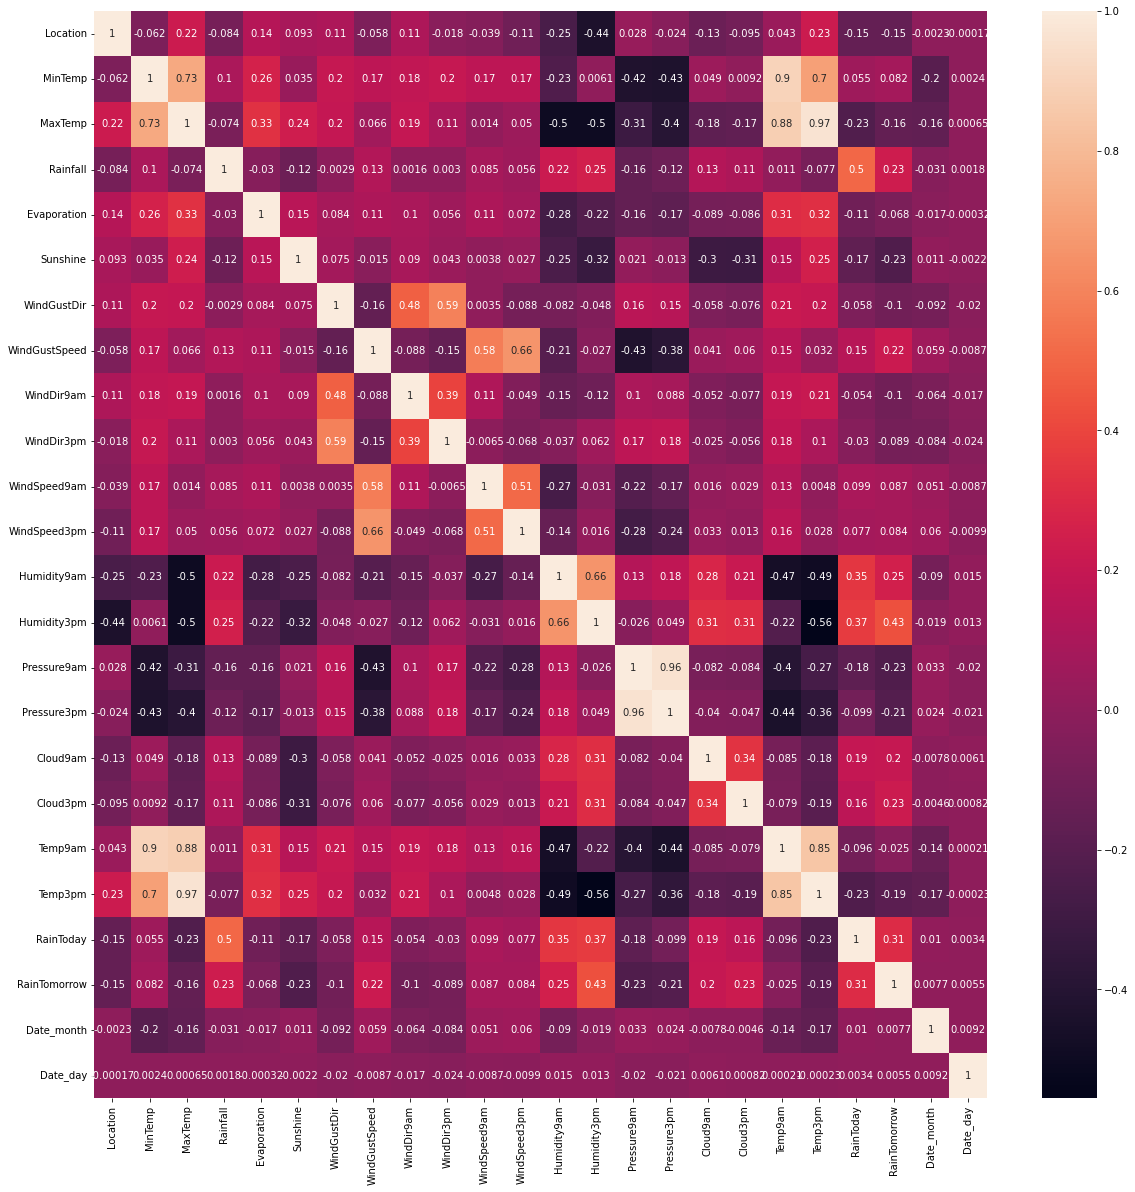

In [34]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

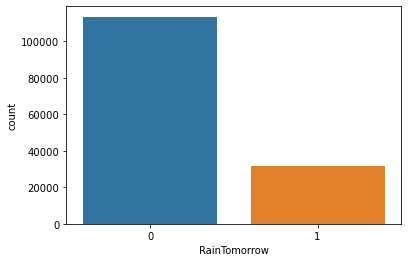

In [43]:
sns.countplot(data["RainTomorrow"])

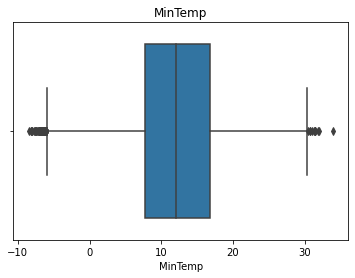

<Figure size 720x720 with 0 Axes>

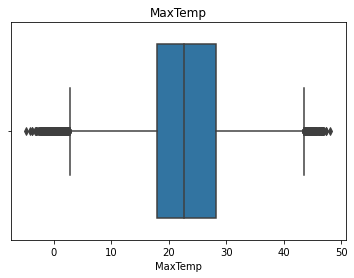

<Figure size 720x720 with 0 Axes>

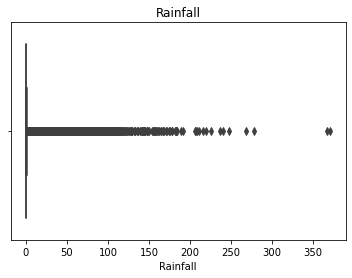

<Figure size 720x720 with 0 Axes>

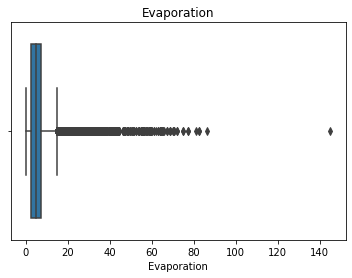

<Figure size 720x720 with 0 Axes>

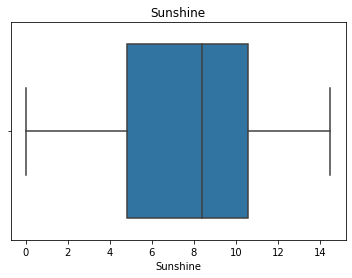

<Figure size 720x720 with 0 Axes>

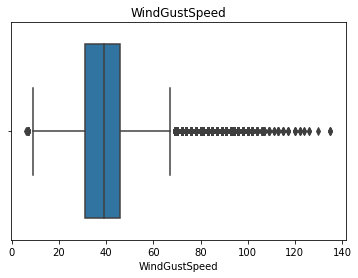

<Figure size 720x720 with 0 Axes>

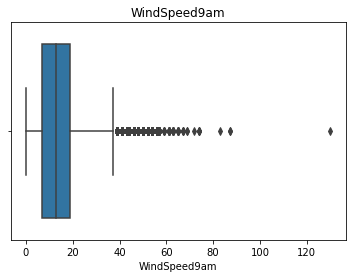

<Figure size 720x720 with 0 Axes>

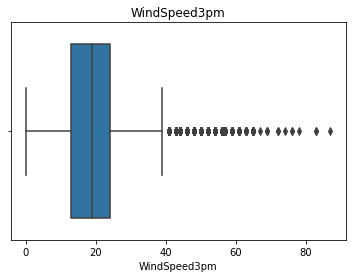

<Figure size 720x720 with 0 Axes>

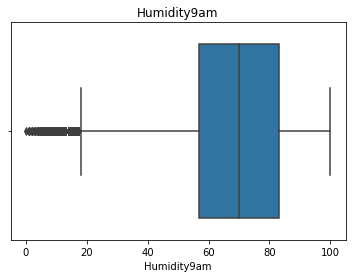

<Figure size 720x720 with 0 Axes>

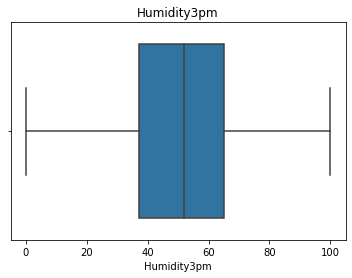

<Figure size 720x720 with 0 Axes>

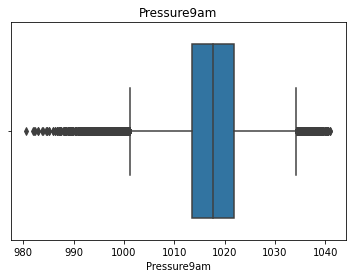

<Figure size 720x720 with 0 Axes>

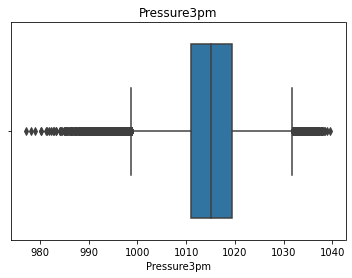

<Figure size 720x720 with 0 Axes>

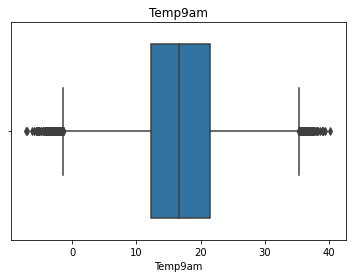

<Figure size 720x720 with 0 Axes>

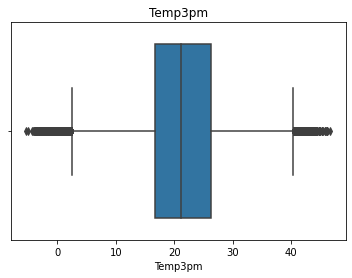

<Figure size 720x720 with 0 Axes>

In [44]:
for feature in continuous_features:
  sns.boxplot(data[feature])
  plt.title(feature)
  plt.figure(figsize=(10,10))
  
  plt.show()

In [45]:
for feature in continuous_features:
  print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [46]:
def outlier(feature):
  IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
  lower_bridge=data[feature].quantile(0.25)-(IQR*1.5)
  upper_bridge=data[feature].quantile(0.75)+(IQR*1.5)
  data.loc[data[feature]>=upper_bridge,feature]=upper_bridge
  data.loc[data[feature]<=lower_bridge,feature]=lower_bridge

In [47]:
for feature in continuous_features:
  outlier(feature)

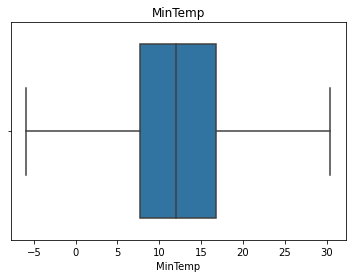

<Figure size 720x720 with 0 Axes>

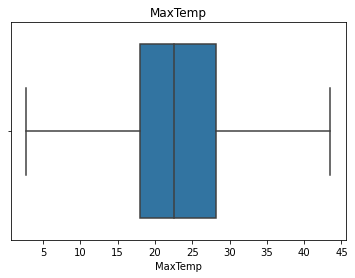

<Figure size 720x720 with 0 Axes>

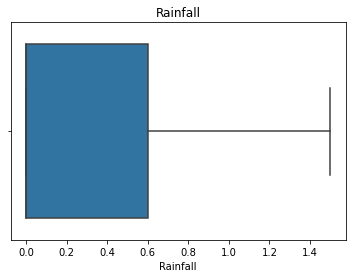

<Figure size 720x720 with 0 Axes>

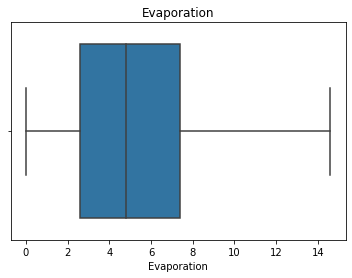

<Figure size 720x720 with 0 Axes>

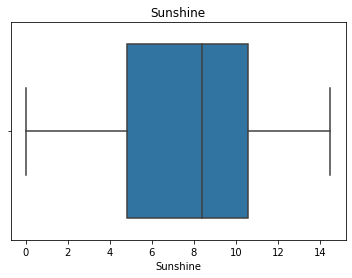

<Figure size 720x720 with 0 Axes>

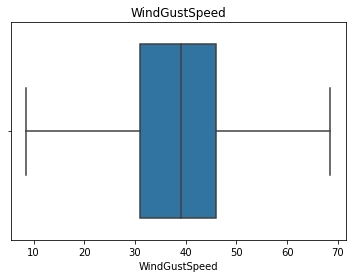

<Figure size 720x720 with 0 Axes>

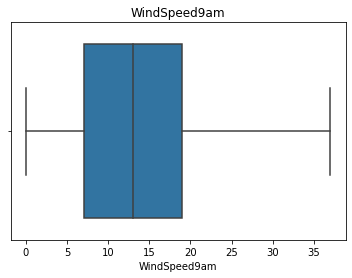

<Figure size 720x720 with 0 Axes>

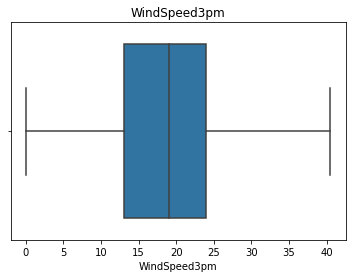

<Figure size 720x720 with 0 Axes>

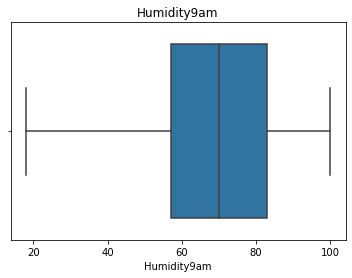

<Figure size 720x720 with 0 Axes>

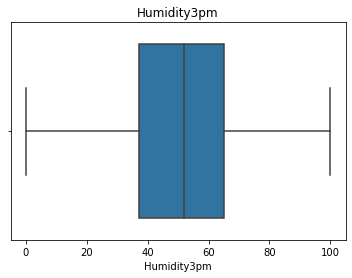

<Figure size 720x720 with 0 Axes>

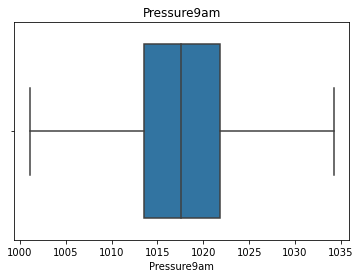

<Figure size 720x720 with 0 Axes>

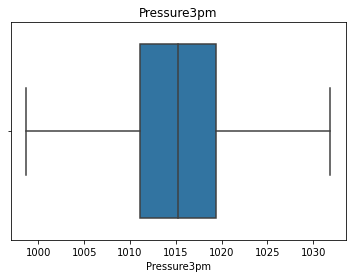

<Figure size 720x720 with 0 Axes>

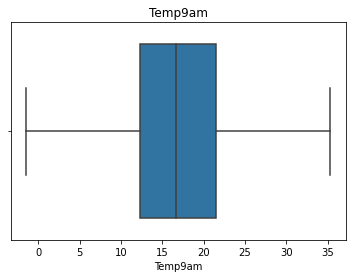

<Figure size 720x720 with 0 Axes>

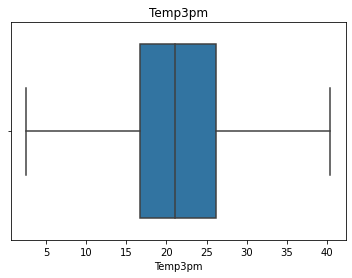

<Figure size 720x720 with 0 Axes>

In [48]:
for feature in continuous_features:
  sns.boxplot(data[feature])
  plt.title(feature)
  plt.figure(figsize=(10,10))
  
  plt.show()

In [49]:
X=data.drop(["RainTomorrow", "Date"],axis=1)
Y=data["RainTomorrow"]

In [50]:
print("Shape of the data X is",X.shape)
print("Shape of the data Y is",Y.shape)

Shape of the data X is (145460, 23)
Shape of the data Y is (145460,)


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [52]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
22926,6,18.8,23.7,0.2,5.0,7.3,13.0,52.0,14.0,15.0,...,73.0,1016.6,1013.90,5.0,7.0,21.4,22.2,0,3,12
80735,18,9.3,24.0,0.2,1.6,10.9,11.0,48.0,0.0,5.0,...,55.0,1018.3,1014.60,3.0,5.0,14.3,23.2,0,10,6
121764,26,10.9,22.2,1.4,1.2,9.6,9.0,26.0,1.0,9.0,...,47.0,1017.6,1014.90,1.0,2.0,16.6,21.5,1,8,31
139821,11,19.3,29.9,0.0,9.2,11.0,13.0,43.0,14.0,14.0,...,37.0,1015.9,1012.10,1.0,1.0,23.2,29.1,0,6,11
1867,30,15.7,17.6,1.5,0.0,10.8,15.0,20.0,14.0,14.0,...,100.0,1015.2,1010.50,8.0,8.0,16.5,17.3,1,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,22,17.8,38.1,0.0,14.6,11.5,11.0,39.0,3.0,14.0,...,30.0,1014.5,1009.70,1.0,1.0,25.4,36.8,0,12,20
97639,24,12.5,27.3,0.0,8.0,10.0,4.0,30.0,1.0,3.0,...,32.0,1019.2,1017.30,2.0,8.0,17.0,26.5,0,3,11
95939,39,17.0,29.8,0.0,5.6,9.4,14.0,22.0,2.0,13.0,...,54.0,1019.6,1016.10,5.0,7.0,24.1,29.0,0,6,10
117952,35,11.9,22.0,1.5,6.2,7.7,8.0,35.0,11.0,3.0,...,49.0,1020.0,1018.50,7.0,6.0,17.1,19.7,1,11,20


In [53]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [54]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train_res)
X_test_scaled=scale.fit_transform(X_test)



In [55]:
#Algorithms
lr_clf=LogisticRegression()
df_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
adboost_clf=AdaBoostClassifier()
xgb_clf = XGBClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
knn_clf=KNeighborsClassifier()
nb_clf=GaussianNB()

In [56]:
voting=VotingClassifier(estimators=[("LogisticRegression",lr_clf),("DecisionTreeClassifier",df_clf),
("RandomForestClassifier",rf_clf),("AdaBoostClassifier",adboost_clf),("GradientBoostingClassifier",grad_clf),
("SVC",svc_clf),("KNeighborsClassifier",knn_clf),("GaussianNB",nb_clf),("XGBClassifier",xgb_clf)], voting="hard")

voting.fit(X_train_scaled,y_train_res)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('AdaBoostClassifier', AdaBoostClassifier()),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC()),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('Gauss...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            ma

In [50]:
X_train_scaled.shape

(181714, 23)

In [51]:
y_train.shape

(116368,)

In [52]:
for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,knn_clf,nb_clf):
    clf.fit(X_train_scaled,y_train_res)
    y_pred=clf.predict(X_test_scaled)
    print(clf.__class__.__name__,clf.score(X_train_scaled,y_train_res))
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

    print("===========================")


LogisticRegression 0.788673409863852
LogisticRegression 0.686958614051973
DecisionTreeClassifier 1.0
DecisionTreeClassifier 0.27254915440670974
RandomForestClassifier 1.0
RandomForestClassifier 0.30565103808607175
AdaBoostClassifier 0.8327316552384516
AdaBoostClassifier 0.3641550941839681
GradientBoostingClassifier 0.8736035748483881
GradientBoostingClassifier 0.23054447958201568
SVC 0.8497639147231364
SVC 0.7275883404372336
KNeighborsClassifier 0.9039864842554783
KNeighborsClassifier 0.6958957789082909
GaussianNB 0.7455451973981091
GaussianNB 0.6845524542829644


In [53]:
joblib.dump(svc_clf, "D:\Artificial_Intelligence\Rain_Fall_Prediction_2\svc.pkl")
# joblib.dump(xgb, "xgb.pkl")

['D:\\Artificial_Intelligence\\Rain_Fall_Prediction_2\\svc.pkl']